Model Dzrewo Dezyzyjne nazwane przeze mnie "Kalkulator rozmiaru". Uzyskuje prognozowany rozmiar kupowanego ubrania w sklepach inrtentowych. Daną objaśnianą jest rozmiar, a parametrami wejściowymi są waga, wiek i wzrost

In [64]:
import pandas as pd  # import biblioteki Pandas 
import matplotlib.pyplot as plt #import biblioteki 
import numpy as np 
import seaborn as sns

In [17]:
df = pd.read_csv('rozmiar_data.csv')
df.head()

weight   age  height size
0      62  28.0  172.72   XL
1      59  36.0  167.64    L
2      61  34.0  165.10    M
3      65  27.0  175.26    L
4      62  45.0  172.72    M

In [18]:
df.dtypes #typ danych

weight      int64
age       float64
height    float64
size       object
dtype: object

In [ ]:
df.isna().sum() #sprawdzenie ile jest wartości zerowych w danych

In [23]:
df= df.dropna() #usunięcie wartości zerowych z danych

In [ ]:
df.isna().sum() #sprawdzenie 

In [24]:
df['height'] = df['height'].astype(int) # zamiana z float na int
df['age'] = df['age'].astype(int)

In [25]:
df['size'].value_counts() #zliczenie ilości występowania okreśłonego rozmiarów

M       29575
S       21829
XXXL    21259
XL      19033
L       17481
XXS      9907
XXL        69
Name: size, dtype: int64

In [28]:
#Zostawiam osoby w wieku od 17 do 40 lat
df = df.loc[(df['age'] >= 17.0) & (df['age'] <= 40)]
print('Min value: ', df['age'].min())
print('Max value: ',df['age'].max())

Min value:  17
Max value:  40


In [29]:
#zliczam ilość występowania określonego rozmiaru w przedziale osób w wieku od 17 do 40 lat
df['size'].value_counts()

M       25057
S       19156
XXXL    15823
XL      15159
L       14377
XXS      9038
XXL        49
Name: size, dtype: int64

In [32]:
print('Średni wzrost dla ubrań XXS: ',df.loc[df['size'] == 'XXL']['height'].mean(), ' i średniej wagi: ', df.loc[df['size'] == 'XXS']['weight'].mean())
print('Średni wzrost dla ubrań S: ',df.loc[df['size'] == 'S']['height'].mean(),' i średniej wagi: ', df.loc[df['size'] == 'S']['weight'].mean())
print('Średni wzrost dla ubrań M: ',df.loc[df['size'] == 'M']['height'].mean(),' i średniej wagi: ', df.loc[df['size'] == 'M']['weight'].mean())
print('Średni wzrost dla ubrań L: ',df.loc[df['size'] == 'L']['height'].mean(),' i średniej wagi: ', df.loc[df['size'] == 'L']['weight'].mean())
print('Średni wzrost dla ubrań XL: ',df.loc[df['size'] == 'XL']['height'].mean(),' i średniej wagi: ', df.loc[df['size'] == 'XL']['weight'].mean())
print('Średni wzrost dla ubrań XXL: ',df.loc[df['size'] == 'XXL']['height'].mean(),' i średniej wagi: ', df.loc[df['size'] == 'XXL']['weight'].mean())
print('Średni wzrost dla ubrań XXXL: ',df.loc[df['size'] == 'XXXL']['height'].mean(),' i średniej wagi: ', df.loc[df['size'] == 'XXXL']['weight'].mean())

Średni wzrost dla ubrań XXS:  159.30612244897958  i średniej wagi:  50.58054879398097
Średni wzrost dla ubrań S:  163.48888076842763  i średniej wagi:  54.27416997285446
Średni wzrost dla ubrań M:  165.23231033244204  i średniej wagi:  58.414694496547874
Średni wzrost dla ubrań L:  166.6621687417403  i średniej wagi:  62.63483341448146
Średni wzrost dla ubrań XL:  167.33155221320666  i średniej wagi:  66.01378718912856
Średni wzrost dla ubrań XXL:  159.30612244897958  i średniej wagi:  66.73469387755102
Średni wzrost dla ubrań XXXL:  167.55646843202933  i średniej wagi:  76.5787777286229


Ilość osób nosząca rozmiar XXL jest wartością nieużyteczną, dlatego została przeze mnie usunięta

In [33]:
df = df[df['size']!= 'XXL']

In [34]:
df["size"].replace({"XXS": "XS", "XXXL": "XXL"}, inplace=True)

In [35]:
df["size"].value_counts()

M      25057
S      19156
XXL    15823
XL     15159
L      14377
XS      9038
Name: size, dtype: int64

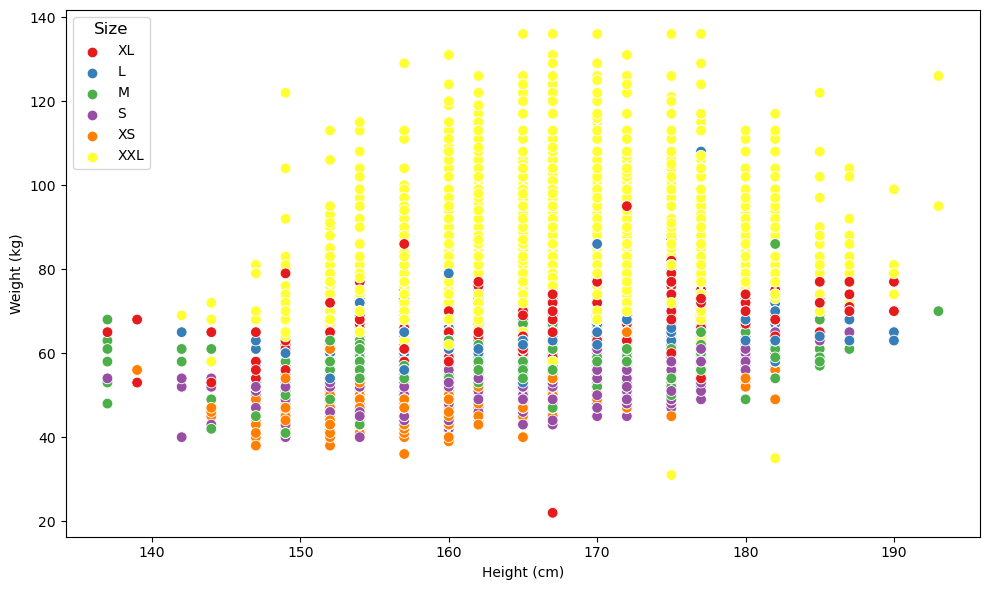

In [47]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df, x='height', y='weight',   hue='size', palette='Set1', s=60)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Size', title_fontsize = 12) 
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df['size']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/4)

In [49]:
#import klasyfikatora i meytk potzrebnych do stworzenia modelu
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:")
print(accuracy_score(y_test, predictions))

Accuracy:
0.5003042226098243


Metryka ta mówi nam o stosunku dobrze dokonanych klasyfikacji do ilości wszystkich dokonanych klasyfikacji. Wynosi ok 50%. Co oznacza, że to czy rzuciłabym monetą i zastosowała model - mam podobne wyniki ;) ale przynajmneij się pouczyłam. :D

In [50]:
y_test

39543       M
103220    XXL
32914       M
60334       M
79909       L
         ... 
80441      XS
69260       M
100192      L
61084       L
1111      XXL
Name: size, Length: 24653, dtype: object

In [62]:
d = {'weight':[64], 'age': [32], 'height': [169]}
Agnieszka = pd.DataFrame(data=d)
Agnieszka

weight  age  height
0      64   32     169

In [63]:
model.predict(Agnieszka)[0]

'L'